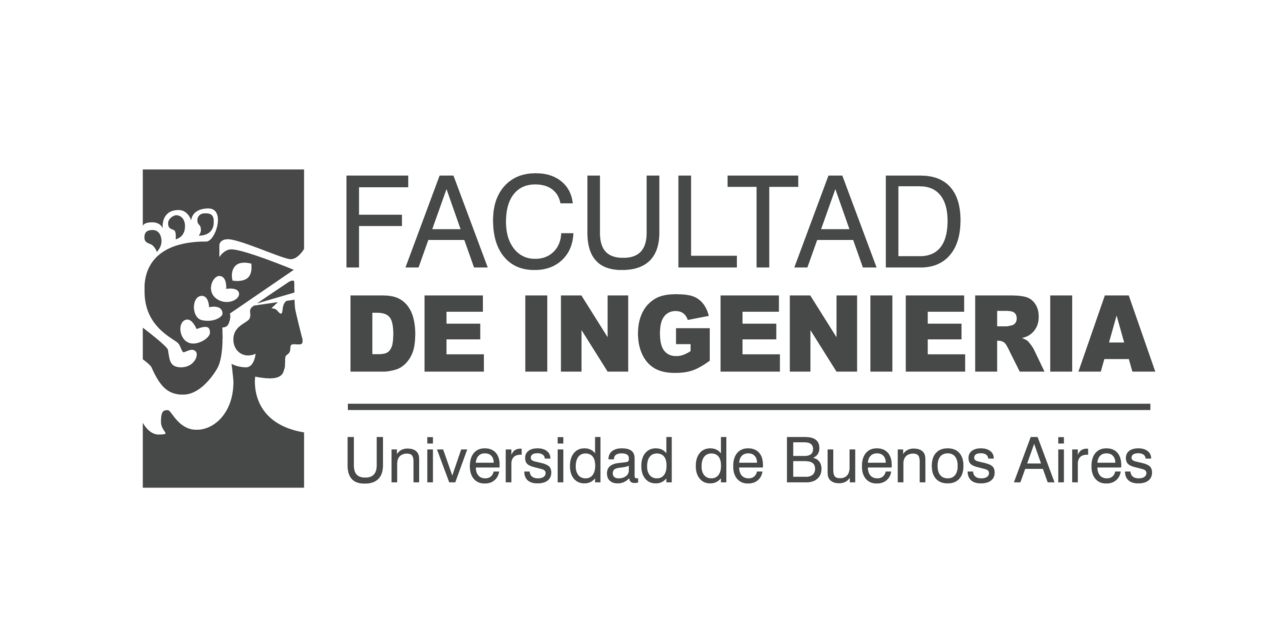

**Profesores:** <br />
Dr. Facundo Adrián Lucianna - facundolucianna@gmail.com <br />
Dr. Álvaro Gabriel Pizá - piza.ag@gmail.com <br />

**Alumnos:** <br />
Ing. Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Ing. Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Ing. Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/AMIA-TP3 <br />


# TP integrador: Aprendizaje de Máquina 1

### Objetivos de la materia:
El objetivo está centrado en disponer de las herramientas de machine learning como así también la pericia para poder evaluar de antemano los diferentes casos de aplicación de técnicas de machine learning.

### Evaluación
La evaluación de los conocimientos impartidos durante las clases será a modo de entrega de trabajo práctico final. La entrega de trabajo final de la cursada comprende de una investigación, desarrollo y resultados finales basados en un set de datos a elección por el grupo (máximo 6 personas).

### Criterios de aprobación
Los criterios de aprobación son los siguientes:

- Obligación de trabajar en grupo mínimo de 2 y máximo de 6. Excepciones se pueden hacer mediante un correcto justificativo.
- Cada TP debe citar la fuente de información de evaluación, es decir, citar de donde se obtuvieron los datos.
- Puede ser entregado en cualquier formato, preferentemente en notebook de ipython (formato ipynb). También puede entregarse mediante un documento en Google Colab.
- Contendrá la propuesta de investigación en los datos, citando el porqué de la evaluación y que se pretende encontrar o descubrir con dicha investigación
- Deberá explicar el porqué de la elección del algoritmo empleado para la resolución del problema y cómo llegó a esa elección por sobre otras opciones
- Deberá expresar de manera clara el resultado de la investigación aportando las métricas necesarias para comprender cómo se desempeña el algoritmo elegido.
- El entregable debe venir con el código acompañado para su reproducibilidad. 
- En su cierre debe dar una reflexión de su investigación y proponer nuevos caminos de resolución en el caso de que sea necesario. 
- Como última fecha de entrega del trabajo, estará limitado a 7 días posteriores a la última clase.
- La entrega es por el aula virtual, ya sea el envío del contenido o el link a repositorio (de GitHub o GitLab) con el trabajo.

## Tabla de Contenido
1. [Propuesta de investigación](#Propuesta-de-investigación)
2. [Pipeline de trabajo](#Pipeline-de-trabajo)
3. [Pre procesamiento de los datos](#Pre-procesamiento-de-los-datos)
    1. [TfidfVectorizer](#TfidfVectorizer)
    2. [Exploración y balance de clases](#Exploración-y-balance-de-clases)
4. [Análisis de modelos](#Análisis-de-modelos)
5. [Busqueda de Hiper Parámetros](#Busqueda-de-Hiper-Parámetros)

# Propuesta de investigación

Para la realización de este trabajó se utilizará el dataset de **reviews** de estadía en hoteles de la empresa [Trip Advisor Hotel Reviews](https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews). El objetivo es poder entranar modelos que permitan realizar tareas de *sentyment analysis* de las reviews con el objetivo de poder utilizarlos, eventualemente para funcionalidades como:

- Categorización automática de comentarios en portales o sitios web para poner buenos comentarios en páginas de distintos productos
- Filtrar comentarios negativos para ser analizados, posteriormente, de forma manual por personal especializado y poder mejorar/modificar productos

Con el fin de trabajar con los temas vistos durante la cursada, nos propusimos hacer predicciones de puntuación de las reviews y luego compararla con un análisis mas acotado de sentimientos **Negativos**, **Neutros** y **Positivos**.
Se realizó un fuerte trabajo en la preparación y normalización del dataset para ser utilizado en varios de los modelos vistos en clase.
Se eligió como línea base la regresión logística vista en Introducción a IA y se utilizaron para comparar clasificadores basados en SVM (kernel lineal y rbf) y Catboost. Adicionalmente algunos de estos modelos se usaron para hacer **ensemble** con la idea de compensar los puntos débiles entre ellos.

Se realizaron búsquedas de hiperparámetros con Optuna y GridSearch (sklearn) para obtener los mejores modelos y luego se los comparó en performance para poder obttener conclusiones. 

Se generan filas sintéticas extras con **Llama3-1B-Instruct** para balancear las clases. Estos datos se tomaron como reseñas nuevas, por lo que las muestras se utilizaran tanto para splits de train como de test. Esto de detalla en la sección de **Pipeline de trabajo** a continuación.

*Fuente Original*: https://www.kaggle.com/datasets/andrewmvd/trip-advisor-hotel-reviews

Con respecto a la organización del trabajo, en esta notebook se detallarán los resultados obtenidos, las justificaciones de los modelos y las conclusiones. El detalle de cada uno de estos puntos se encontrará en el resto de las notebooks adjuntadas:
- **pre_processing.ipynb**: Tareas de limpieza y pre procesamiento de los datos para poder ser utilizado por los modelos seleccionados
- **hiperparams_search.ipynb**: Búsqueda de hiperparámetros de los modelos principales utilizando Optuna
- **inference_model_compare.ipynb**: Entrenamiento de los modelos seleccionados con los mejores hiperparámetros obtenidos en la notebook anterior

# Pipeline de trabajo

El proceso seguido para realizar el análisis de sentimientos del dataset de reviews de TripAdvisor consta de los siguientes pasos:

1. **Preparación de datos**:
   - Limpieza y preprocesamiento de las reviews.
2. **Extracción de características**:
   - Creación de una matriz dispersa utilizando TF-IDF.
3. **Reducción de dimensionalidad**:
   - Aplicación de TruncatedSVD para obtener una representación densa.
4. **Entrenamiento de modelos**:
   - Optimización de hiperparámetros mediante Optuna para SVC (lineal y RBF), CatBoost y LogisticRegression.
   - Uso de GridSearchCV para la regresión logística.
5. **Instanciación de modelos**:
   - Configuración de los modelos con los mejores parámetros encontrados.
6. **Comparación de modelos**:
   - Evaluación de los modelos y extracción de conclusiones.

# Pre procesamiento de los datos

En esta sección se implementa el pipeline de pre procesamiento de las reviews para homogeneizar los textos. Por ejemplo, se procedió a remover stopwords (palabras como conectores que son tan comunes que no agregaran información al modelo pero costarán computo procesarlas), stopwords de dominio, llevar todo a minusculas, tratar multiples palabras concatenadas con wordninja para separarlas, remover caracteres especiales, normalizar el tratamiento de contracciones (para no tomar como cosas distintas won't y will not por ejemplo). De esta manera, a los modelos elegidos para entrenar en etapas posteriores les llegará un dataset normalizado y consistente.

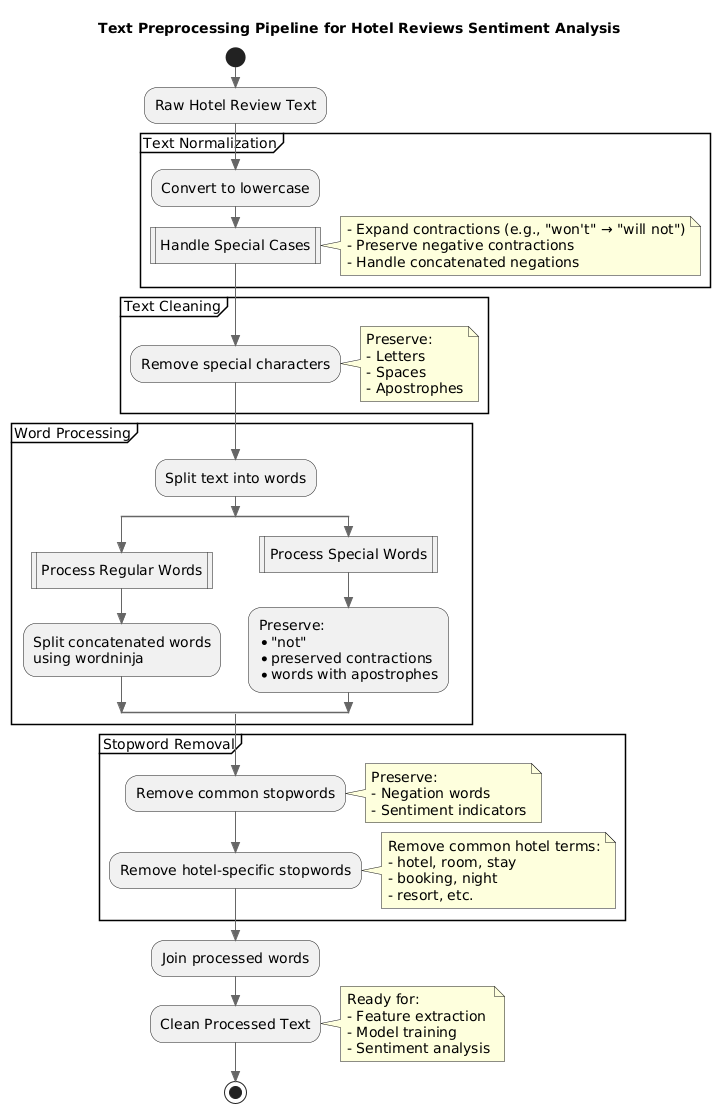

In [12]:
display(Markdown(preprocessing))

Debido a la calidad pobre de muchas reviews en el dataset (como la que se muestra en el ejemplo debajo de esta celda), y al desbalanceo que se ve en el histograma de esta sección, es que se deciden las siguientes modificaciones:

- Se dropean filas de clases mayoritarias 5 y 4 para atajar el problema de desbalance y, al ser clases positivas en un extremo, son las que poseen menos lenguaje neutro. Por lo tanto, entendemos que tener menos filas no afectara considerablemente en la detección de los patrones necesarios para clasificarlas
- Se agregan reviews en las clases minoritarias 1, 2 y 3 respectivamente utilizando un LLM SoTA. Puntualmente, utilizamos **meta-llama/Llama-3.2-3B**. Los detalles de como se generaron estas reviews se observa en el apéndice de esta notebook

A continuación, se puede observar la diferencia entre una review original y la versión post pipeline:

In [13]:
dataset = pd.read_csv('data/cleaned_dataset_processed_balanced.csv')
highlight_differences(dataset['review'][6], dataset['cleaned_review'][6])

### TfidfVectorizer

El `TfidfVectorizer` es una herramienta de preprocesamiento de texto de la librería `scikit-learn` que convierte un conjunto de documentos de texto en una matriz de características basada en el cálculo de la frecuencia inversa de término-documento (TF-IDF).

#### Principales componentes de TF-IDF
1. **TF (Term Frequency)**: Representa la frecuencia de un término en un documento, es decir, cuántas veces aparece una palabra en relación con el total de palabras en el documento.
2. **IDF (Inverse Document Frequency)**: Evalúa la importancia de un término en el corpus completo. Reduce el peso de palabras comunes que aparecen en muchos documentos, como palabras vacías (stopwords).

La fórmula para calcular el peso $\text{TF-IDF}(t, d)$ de un término $t$ en un documento $d$ es:
$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \log\left(\frac{N}{1 + \text{DF}(t)}\right)
$$
Donde:
- $N$: Número total de documentos.
- $\text{DF}(t)$: Número de documentos que contienen el término $t$.

#### Funcionalidades principales
- **Normalización**: Los valores pueden ser normalizados para evitar que los documentos largos dominen las similitudes.
- **Stopwords**: Soporta la eliminación de palabras irrelevantes.
- **N-grams**: Puede considerar secuencias de palabras (bigramas, trigramas) como características.

#### Ventajas
- Capta la importancia relativa de las palabras en el contexto del documento y el corpus.
- Reduce el impacto de palabras comunes.

El `TfidfVectorizer` es fundamental para transformar datos textuales en características numéricas que los modelos de aprendizaje automático puedan procesar de manera efectiva.


### Exploración y balance de clases

Una visualización de WordCloud nos permitio ver cierta correlación entre las palabras utilizadas para clases positivas y negativas como se observa a continuzaicón. Por otro lado, se detecta tanto por t-SNE como por la cantidad de reviews en la clase neutra que seguramente sea allí donde se presentes los mayores problemas para la clasificación. Esto se debe en parte, a que seguramente la neutralidad no tenga expresiones o palabras distintivas como si lo tengan las expresiones positivas o negativas y, en parte, a que hay muy pocas muestras ya que seguramente haya un sesgo de que hay poca motivación a dejar una recomendación cuando no se tiene nada que destacar. 

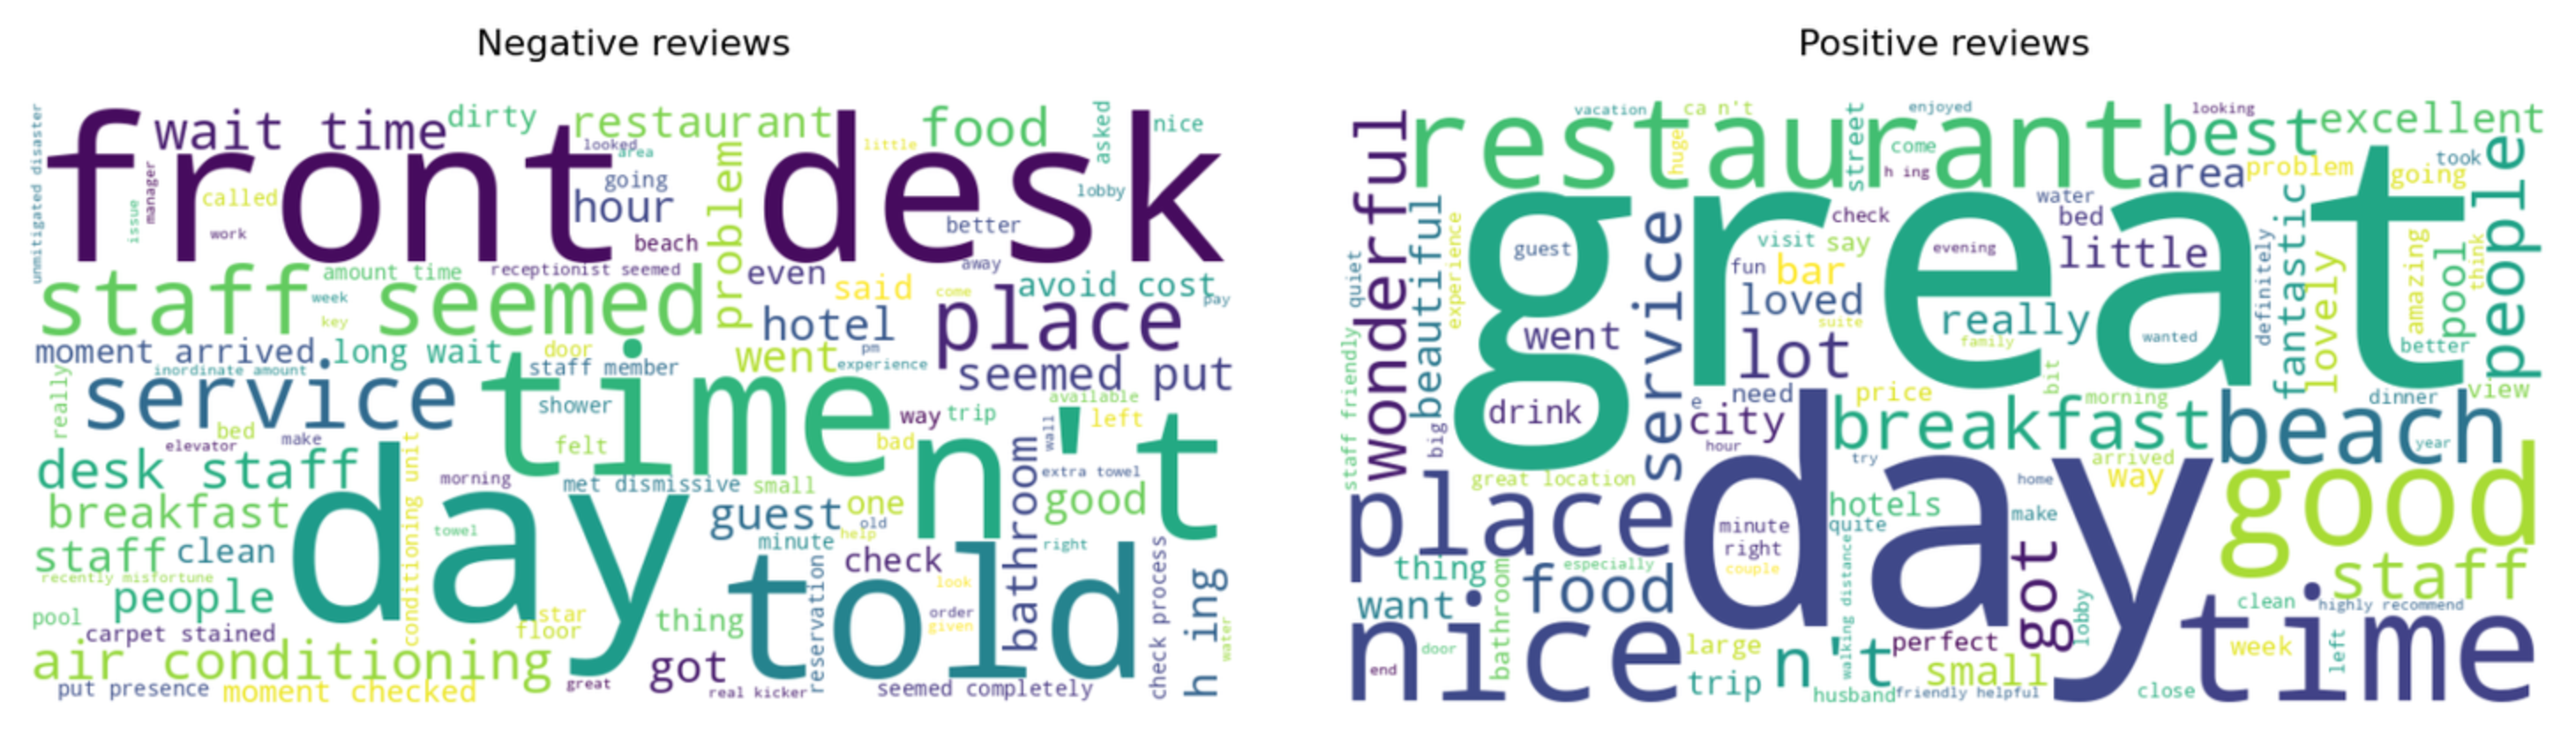

In [20]:
display(Markdown(word_cloud))

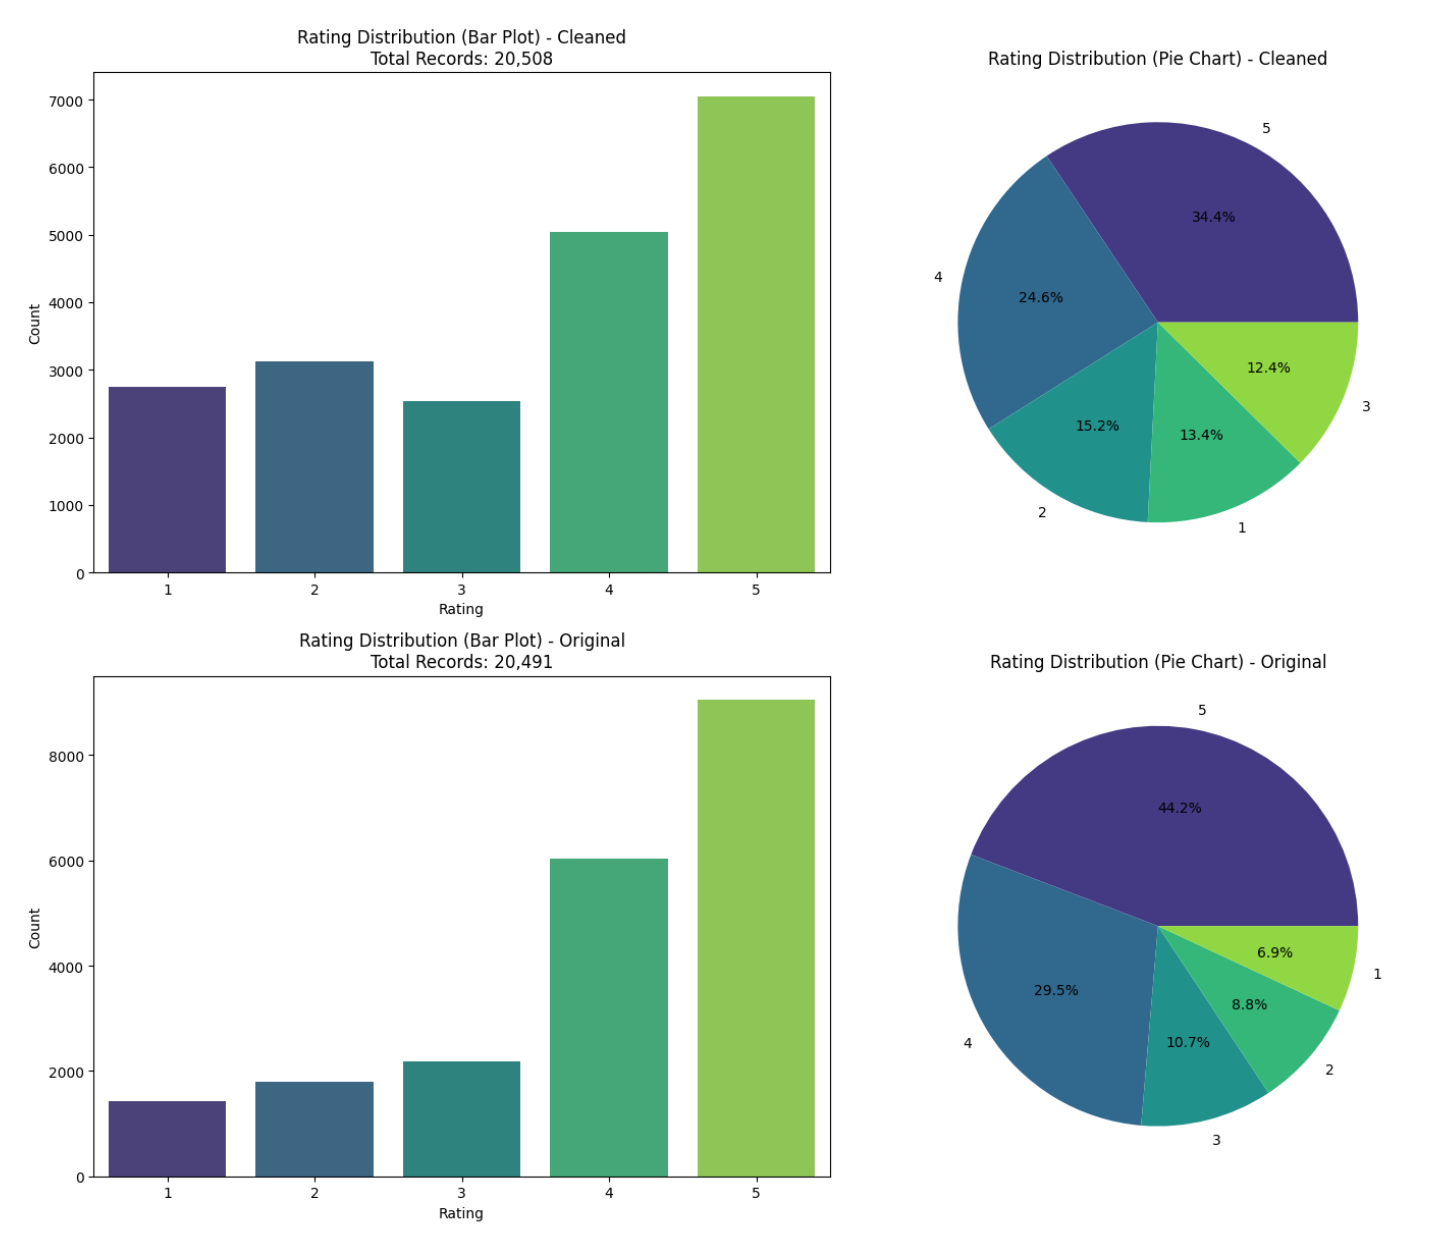

In [19]:
display(Markdown(pre_processing_classes))

# Análisis de modelos

#### Regresión Logística (LogisticRegression)
La regresión logística es un modelo de clasificación lineal que se utiliza para predecir la probabilidad de una clase en función de una o más características independientes. Funciona aplicando una función sigmoide a una combinación lineal de las características de entrada, lo que permite obtener una probabilidad entre 0 y 1. Es especialmente útil para problemas de clasificación binaria, pero también puede extenderse a problemas de clasificación multiclase.

**Justificación**: La regresión logística es un buen punto de partida debido a su simplicidad y capacidad para manejar problemas de clasificación. Proporciona una línea base interpretativa para comparar con modelos más complejos.

#### SVC lineal (LinearSVC)
El SVC lineal es una variante del Support Vector Machine (SVM) que utiliza un kernel lineal. Este modelo busca encontrar el hiperplano que mejor separa las clases en el espacio de características. Es eficiente para problemas de clasificación lineal y es adecuado para conjuntos de datos grandes debido a su rapidez.

**Justificación**: El SVC lineal es adecuado para problemas donde las clases son linealmente separables. Su simplicidad y velocidad lo hacen ideal para obtener resultados rápidos y establecer una línea base para modelos más complejos.

#### SVC RBF (SVC)
El SVC con kernel RBF (Radial Basis Function) es una variante del SVM que utiliza un kernel no lineal. Este modelo es capaz de capturar relaciones complejas entre las características de entrada al proyectarlas en un espacio de mayor dimensión. Es especialmente útil cuando las fronteras de decisión no son lineales. Se obervó que podian ser de especial utilidad al realizar t-SNE sobre el conjunto de datos, donde algunas clases se visualizaban como separables, no obstante esta técnica también advertia sobre ciertos problemas para discriminar o separar entre otras.

**Justificación**: El SVC RBF es adecuado para problemas donde las relaciones entre las características no son lineales. Su capacidad para capturar patrones complejos lo hace ideal para mejorar la precisión en problemas de clasificación difíciles.

#### Catboost (CatBoostClassifier)
CatBoost es un algoritmo de boosting basado en árboles de decisión que es especialmente eficiente para manejar características categóricas. Utiliza una técnica de ordenamiento para transformar las características categóricas en números y aplica boosting para mejorar iterativamente el rendimiento del modelo.

**Justificación**: CatBoost es ideal para problemas con características categóricas y grandes volúmenes de datos. Su capacidad para manejar automáticamente las características categóricas y su eficiencia en términos de tiempo de entrenamiento lo hacen adecuado para este problema.

#### Ensemble (VotingClassifier)
El VotingClassifier es un modelo de ensamblaje que combina las predicciones de múltiples modelos base para mejorar la precisión general. Puede utilizar votación mayoritaria (hard voting) o votación ponderada por probabilidades (soft voting) para tomar la decisión final.

**Justificación**: El uso de un ensemble permite combinar las fortalezas de diferentes modelos base, compensando sus debilidades individuales. Esto puede resultar en un rendimiento general mejorado y una mayor robustez en la clasificación de las reviews.

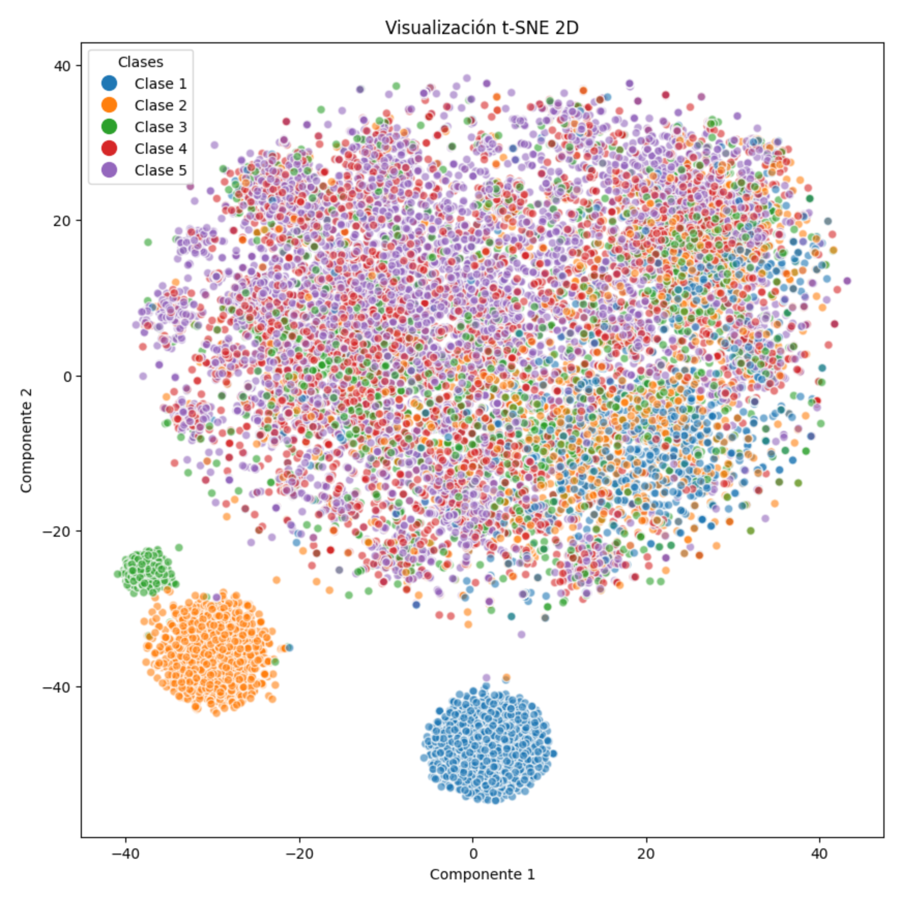

In [16]:
display(Markdown(tsne))

# Busqueda de Hiper Parámetros

Como punto de partida se intentó realizar una representación de las variables con una reducción dimensional t-SNE, donde pudimos inferir que ciertas palabras era claves para poder discriminar entre sentimientos, pero que a su vez habia muschas otras que se solapaban.

En la selección de los modelos para evaluar se utilizaron los siguientes criterios:
- Regresión Logística como línea base por su simplicidad y capacidad en los problemas de clasificación multinomial.
- SVC lineal por su simplicidad y velocidad, utilizando la estrategia OVO para mejorar las fronteras de clasificación
- SVC RBF, para poder clasificar en escenarios más complejos donde las fronteras lineales no pueden
- Catboost para utilizar los métodos de boosting en busqueda de minimizar el error
- Ensemble con VotingClassifier para combinar las distintas características de los modelos.

Se implementaron dos técnicas principales para la optimización de hiperparámetros:

- **Optuna**: Se utilizó para encontrar los mejores hiperparámetros en los siguientes modelos:
  - SVC con kernel lineal.
  - SVC con kernel RBF.
  - CatBoost.
- **GridSearchCV**: Aplicado para la regresión logística debido a su simplicidad y naturaleza interpretativa.

Los parámetros evaluados incluyeron:

- **SVC**: Regularización (C), kernel (lineal o RBF) y gamma (para RBF).
- **CatBoost**: Número de iteraciones, tasa de aprendizaje, y profundidad de árboles.
- **Regresión logística**: Parámetro de regularización (C).


# Inferencia de los modelos y comparaciones

Los modelos fueron instanciados con los mejores parámetros encontrados y evaluados utilizando métricas como:
- Accuracy
- Precisión.
- F1-score.
- Matriz de confusión.

Resultados destacados:

1. **SVC (RBF)**: Excelente capacidad para capturar relaciones no lineales en los datos.
2. **CatBoost**: Mejor rendimiento en términos de rapidez y manejo de características categóricas.
3. **Regresión logística**: Resultado base interpretativo, con menor precisión comparado con los modelos complejos.

# Conclusiones

# Auxiliar

In [18]:
from lib.utils import *
import io
import base64
from PIL import Image
from IPython.display import display, Markdown


# PIPELINE
with open('diagrams/preprocessing.txt', 'r') as file:
    base64_string = file.read()
preprocessing = f'![Text_Pipeline](data:image/png;base64,{base64_string})'

# WORDCLOUD
with open('img/word_cloud.txt', 'r') as file:
    base64_string = file.read()
word_cloud = f'![Text_Pipeline](data:image/png;base64,{base64_string})'

# PIPELINE
with open('img/pre_processing_classes.txt', 'r') as file:
    base64_string = file.read()
pre_processing_classes = f'![Text_Pipeline](data:image/png;base64,{base64_string})'


# TSNE
with open('img/tsne_clases.txt', 'r') as file:
    base64_string = file.read()

# Decode the base64 string
image_data = base64.b64decode(base64_string)
# Open the image using PIL
image = Image.open(io.BytesIO(image_data))
# Resize the image
new_size = (900, 900)  # Set the new size (width, height)
resized_image = image.resize(new_size)
# Convert the resized image back to base64
buffered = io.BytesIO()
resized_image.save(buffered, format="PNG")
resized_base64_string = base64.b64encode(buffered.getvalue()).decode()
# Display the resized image in markdown
tsne = f'![Text_Pipeline](data:image/png;base64,{resized_base64_string})'
